# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
data["plot"] = True

data['sema_len']        = 3000
data['lema_len']        = 30000


data['tp_flag']                 = 'trail'
data['stop_loss_pip']           = 0.0030

data['simple_tp']               = 0.0033

data['pl_move_trail_trigger']   = 0.0033
data['pl_move_trail_size']      = 0.7

data['pl_loss_trail_trigger']   = -0.0028
data['pl_loss_trail_size']      = 1.3


data['start_date'] = {'year':2021, 'month':1, 'date':1}
data['end_date']   = {'year':2021, 'month':1, 'date':6}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 55%|█████████████████▉               | 193793/355371 [21:09<21:46, 123.69it/s]

pls   -0.00609
dtype: float64
--------------------------------------
                 date ord_types     close_type      pls
0 2021-01-04 15:46:00      long  pl_loss_close -0.00279
1 2021-01-05 02:36:47     short  pl_move_close  0.00231
2 2021-01-05 11:35:15     short  pl_loss_close -0.00281
3 2021-01-05 13:54:56      long  pl_loss_close -0.00001
4 2021-01-05 17:08:37     short  pl_loss_close -0.00279


 55%|██████████████████▏              | 196481/355371 [21:30<17:23, 152.24it/s]


KeyboardInterrupt: 

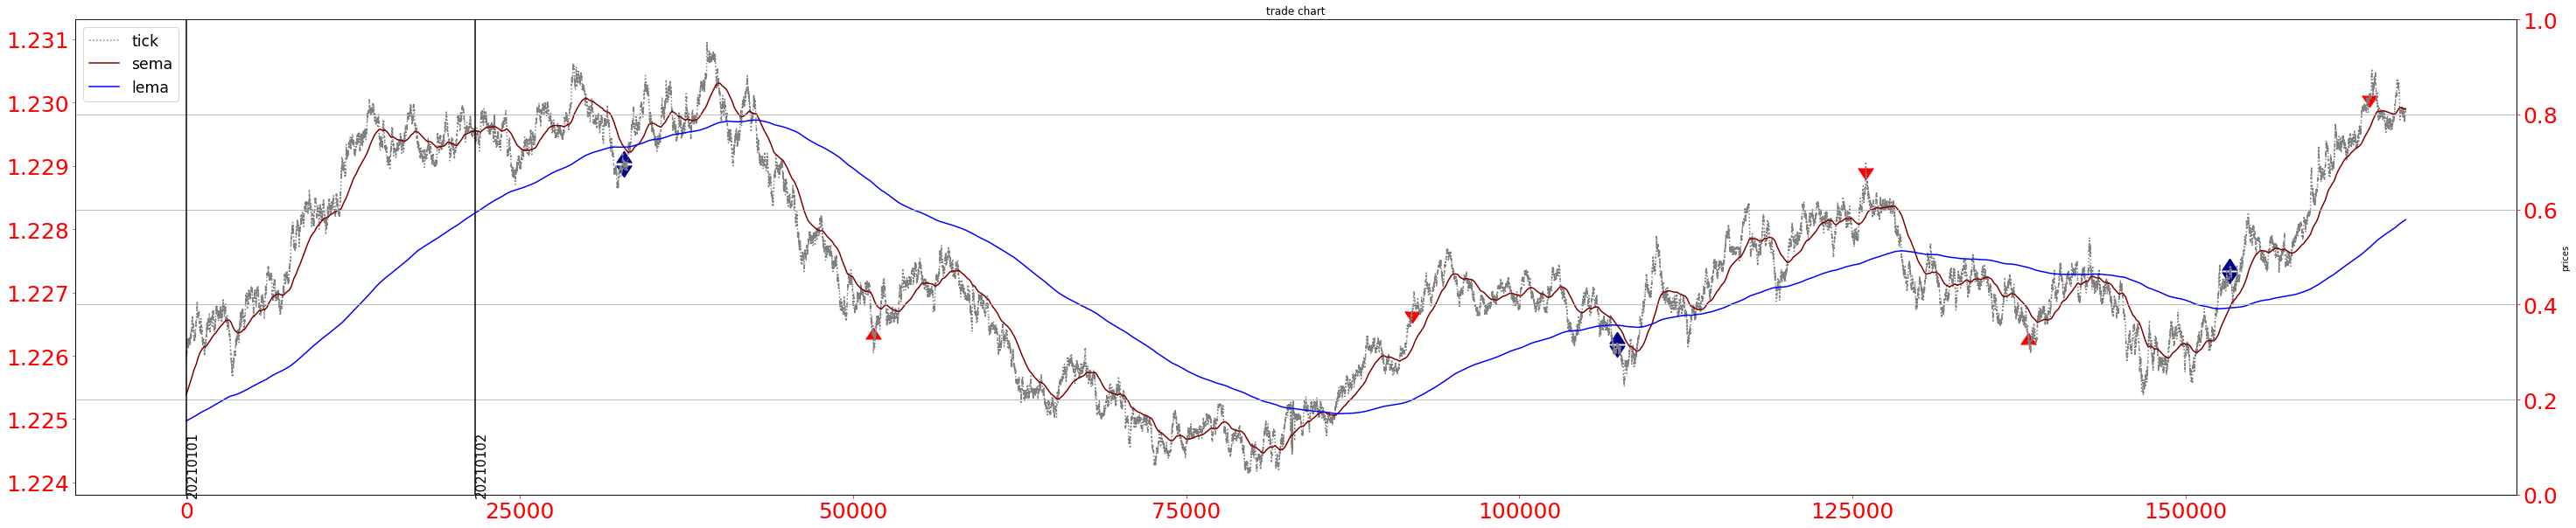

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105', '20210106']
Total PL : -0.00609
-------------
net_pl            : -0.00609/0.01071
-------------
+ve               : num= 1    sum= +0.00231    avg= +0.00231
-ve               : num= 4    sum= -0.0084    avg= -0.0021
-----------------------------------------------------
date_val
4   -0.00279
5   -0.00330
Name: pls, dtype: float64
-----------------------------------------------------
-0.00279    2
-0.00281    1
 0.00231    1
-0.00001    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)